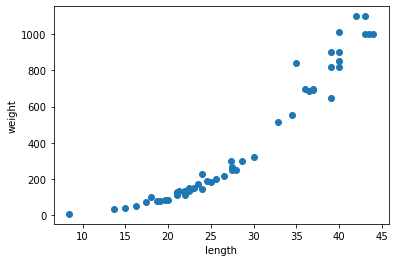

In [37]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# train_input 등은 1차원 배열이기 때문에 reshape(크기, 수)를 활용하여 2차원 배열로 변환해야 함
train_input = train_input.reshape(-1, 1) # 크기를 모를때는 -1로 지정
test_input = test_input.reshape(-1, 1)

In [39]:
# k-최근접 이웃 회귀 알고리즘
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

knr.score(test_input, test_target) # 회귀에서는 결정계수라고 함

0.992809406101064

In [40]:
# mean_absolute_error을 활용하여 타깃과 예측값 사이 차이 구하기
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_prediction, test_target)
mae

19.157142857142862

In [41]:
# 과대적합 & 과소적합
print(knr.score(train_input, train_target),knr.score(test_input, test_target)) 
# 이와 같이 훈련 세트의 점수가 더 낮은 것을 과소적합이라 한다.

# k 값을 변경하면 모델의 복잡도가 변하여 과대&과소를 조절할 수 있다.
knr.n_neighbors = 3 # 3개의 이웃

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target), knr.score(test_input, test_target))
# 훈련 점수기 테스트 점수보다 크면서 차이가 크지 않은 모델이 적합하다.

0.9698823289099254 0.992809406101064
0.9804899950518966 0.9746459963987609


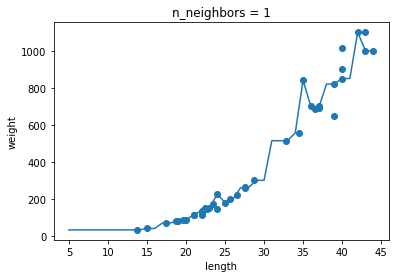

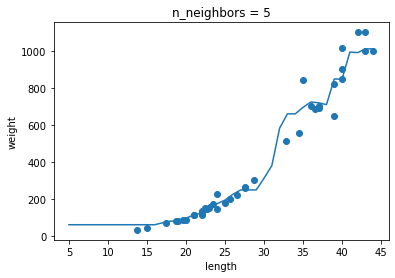

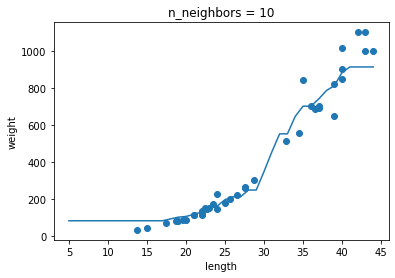

In [42]:

knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

for n in [1,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)

    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()